# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | petropavlovsk-kamchatsky
Processing Record 4 of Set 1 | nizhniy novgorod
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | revda
Processing Record 9 of Set 1 | igarka
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | bandarbeyla
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | villiers
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | tolanaro
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | krasnovishersk
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | san luis de la lom

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,17.51,89,4,3.04,AU,1706819172
1,ilulissat,69.2167,-51.1000,-19.99,71,75,4.63,GL,1706819173
2,petropavlovsk-kamchatsky,53.0452,158.6483,-14.67,86,75,4.00,RU,1706819175
3,nizhniy novgorod,56.3287,44.0020,-1.27,100,100,3.00,RU,1706819004
4,souillac,-20.5167,57.5167,26.30,89,75,5.14,MU,1706819178


In [10]:
#make date into a more readable format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,17.51,89,4,3.04,AU,2024-02-01
1,ilulissat,69.2167,-51.1000,-19.99,71,75,4.63,GL,2024-02-01
2,petropavlovsk-kamchatsky,53.0452,158.6483,-14.67,86,75,4.00,RU,2024-02-01
3,nizhniy novgorod,56.3287,44.0020,-1.27,100,100,3.00,RU,2024-02-01
4,souillac,-20.5167,57.5167,26.30,89,75,5.14,MU,2024-02-01


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,17.51,89,4,3.04,AU,2024-02-01
1,ilulissat,69.2167,-51.1000,-19.99,71,75,4.63,GL,2024-02-01
2,petropavlovsk-kamchatsky,53.0452,158.6483,-14.67,86,75,4.00,RU,2024-02-01
3,nizhniy novgorod,56.3287,44.0020,-1.27,100,100,3.00,RU,2024-02-01
4,souillac,-20.5167,57.5167,26.30,89,75,5.14,MU,2024-02-01


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

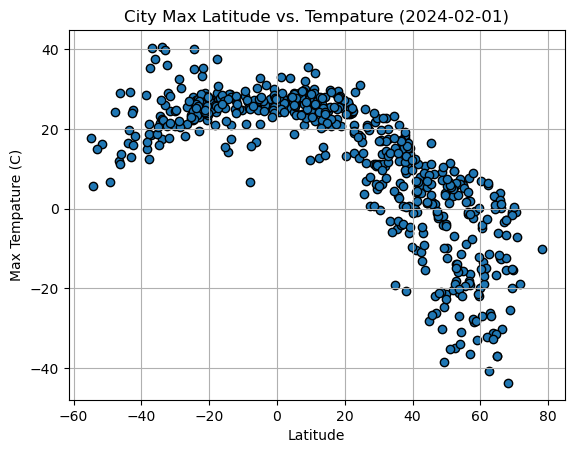

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o', edgecolors="k")

# Incorporate the other graph properties
date = city_data_df['Date'].min()
plt.title(f"City Max Latitude vs. Tempature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Tempature (C)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

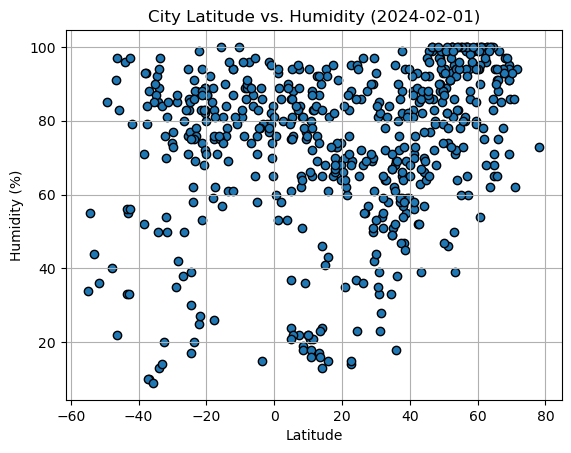

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o', edgecolors="k")

# Incorporate the other graph properties
date = city_data_df['Date'].min()
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

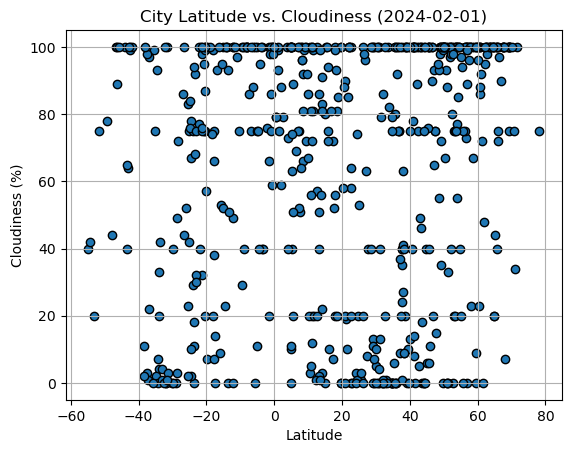

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o', edgecolors="k")

# Incorporate the other graph properties
date = city_data_df['Date'].min()
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

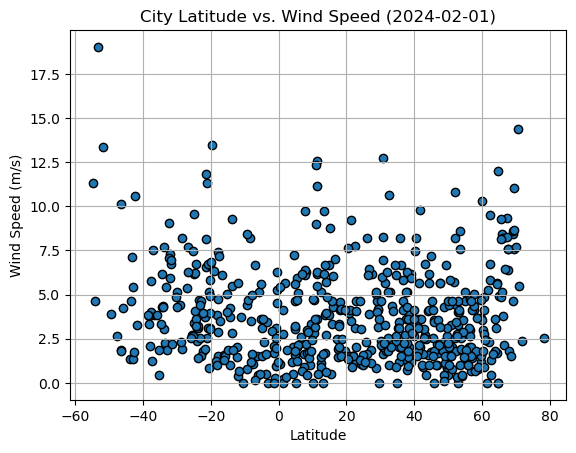

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o', edgecolors="k")

# Incorporate the other graph properties
date = city_data_df['Date'].min()
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def linRegPlot(x, y, title, xlabel,ylabel):

    plt.scatter(x, y, marker='o', edgecolors='k')
    (slope, intercept, rvalue, pvalue, stderror) = linregress(x, y)
    reg_values = x * slope + intercept
    plt.plot(x, reg_values, color='r')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{title}")
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    plt.annotate(line_eq, (0,10), fontsize=15, color="r")
    print(f'The r-value is: {rvalue}')
    print(f'The linear equation is: {line_eq}')

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ilulissat,69.2167,-51.1000,-19.99,71,75,4.63,GL,2024-02-01
2,petropavlovsk-kamchatsky,53.0452,158.6483,-14.67,86,75,4.00,RU,2024-02-01
3,nizhniy novgorod,56.3287,44.0020,-1.27,100,100,3.00,RU,2024-02-01
5,georgetown,5.4112,100.3354,27.75,88,20,2.06,MY,2024-02-01
6,yellowknife,62.4560,-114.3525,-11.44,96,100,6.71,CA,2024-02-01


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,17.51,89,4,3.04,AU,2024-02-01
4,souillac,-20.5167,57.5167,26.30,89,75,5.14,MU,2024-02-01
9,adamstown,-25.0660,-130.1015,24.89,86,42,9.59,PN,2024-02-01
12,villiers,-27.0303,28.6006,18.13,38,86,5.35,ZA,2024-02-01
13,tolanaro,-25.0319,46.9987,25.04,83,75,6.17,MG,2024-02-01


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8133686527661806
The linear equation is: y = -0.74x + 33.78


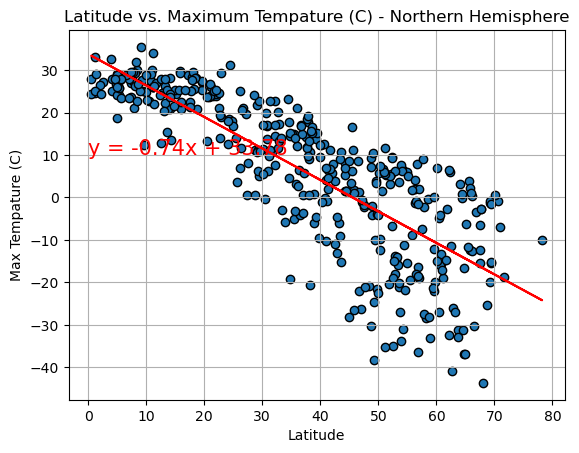

In [45]:
# Linear regression on Northern Hemisphere
linRegPlot(northern_hemi_df["Lat"],
           northern_hemi_df["Max Temp"],
           "Latitude vs. Maximum Tempature (C) - Northern Hemisphere",
           "Latitude",
           "Max Tempature (C)")


The r-value is: 0.32611909878801526
The linear equation is: y = 0.14x + 27.82


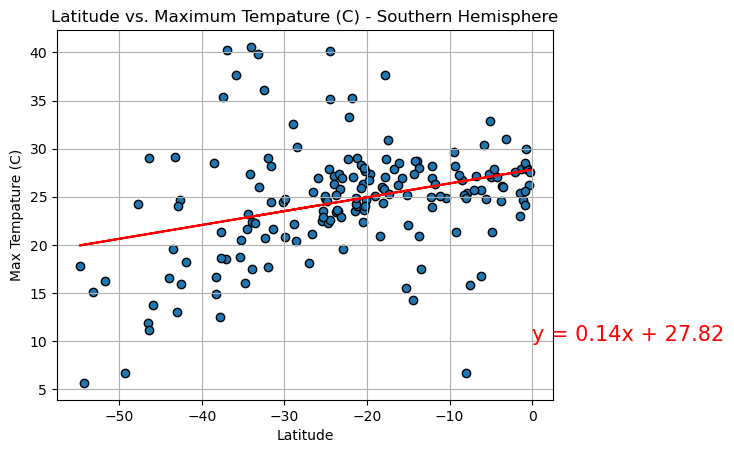

In [46]:
# Linear regression on Southern Hemisphere
linRegPlot(southern_hemi_df["Lat"],
           southern_hemi_df["Max Temp"],
           "Latitude vs. Maximum Tempature (C) - Southern Hemisphere",
           "Latitude",
           "Max Tempature (C)")


**Discussion about the linear relationship:** 
There is a strong correlation between northern and southern hemisphere and the max temp. They both get warmer as you approach the equater.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4156471750240183
The linear equation is: y = 0.45x + 58.02


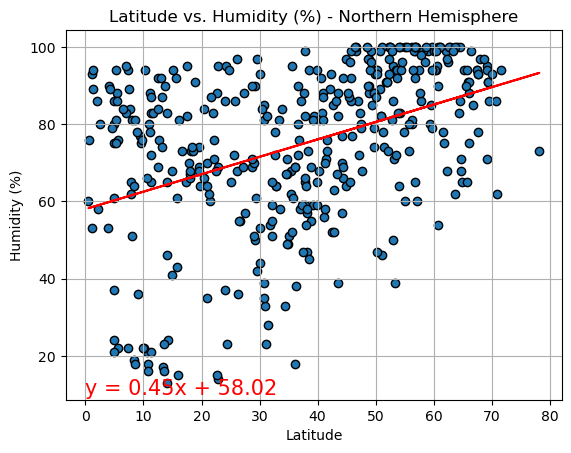

In [47]:
# Northern Hemisphere
linRegPlot(northern_hemi_df["Lat"],
           northern_hemi_df["Humidity"],
           "Latitude vs. Humidity (%) - Northern Hemisphere",
           "Latitude",
           "Humidity (%)")


The r-value is: 0.3055927742136197
The linear equation is: y = 0.5x + 83.56


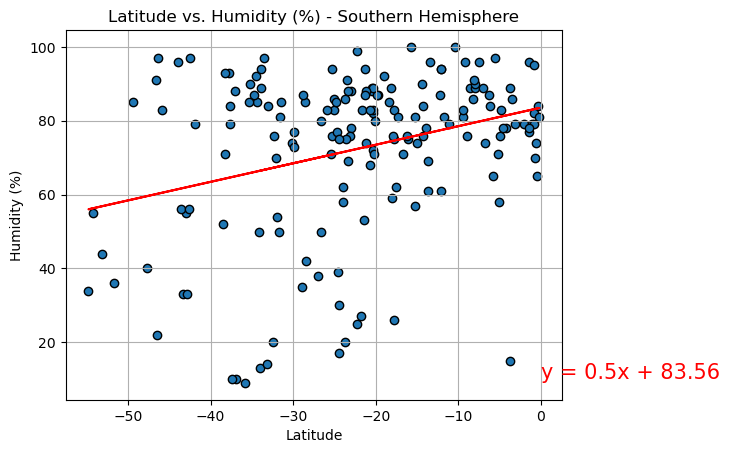

In [48]:
# Southern Hemisphere
linRegPlot(southern_hemi_df["Lat"],
           southern_hemi_df["Humidity"],
           "Latitude vs. Humidity (%) - Southern Hemisphere",
           "Latitude",
           "Humidity (%)")


**Discussion about the linear relationship:** Both southern and northern hemispheres have a positive correlation, however in the northern as you get farther from the equater the humidity increases but in the southern hemisphere as you near the equater the humidity increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17494223424243333
The linear equation is: y = 0.35x + 51.53


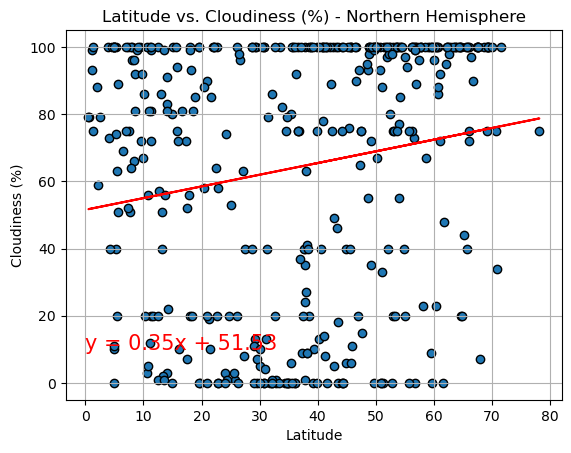

In [49]:
# Northern Hemisphere
linRegPlot(northern_hemi_df["Lat"],
           northern_hemi_df["Cloudiness"],
           "Latitude vs. Cloudiness (%) - Northern Hemisphere",
           "Latitude",
           "Cloudiness (%)")


The r-value is: 0.2479725257564421
The linear equation is: y = 0.7x + 76.61


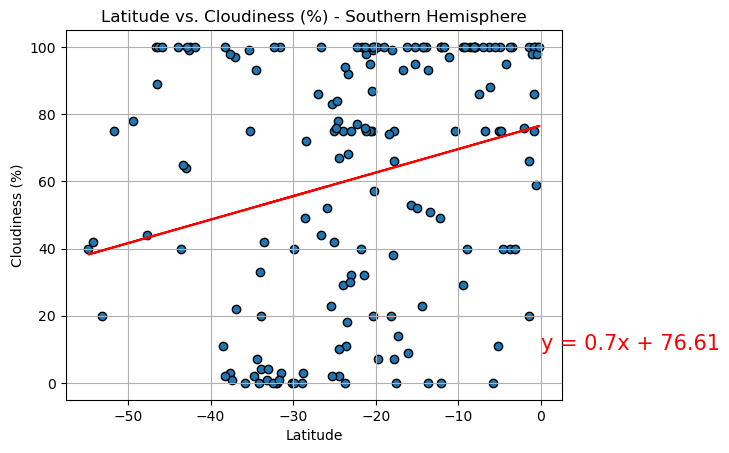

In [50]:
# Southern Hemisphere
linRegPlot(southern_hemi_df["Lat"],
           southern_hemi_df["Cloudiness"],
           "Latitude vs. Cloudiness (%) - Southern Hemisphere",
           "Latitude",
           "Cloudiness (%)")

**Discussion about the linear relationship:** The northern and southern hemisphere both have a positive correlation, however as the northern gets farther from the equater cloud % goes up and in the southern as you get closer to the equator the % increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07024359620231031
The linear equation is: y = 0.01x + 3.26


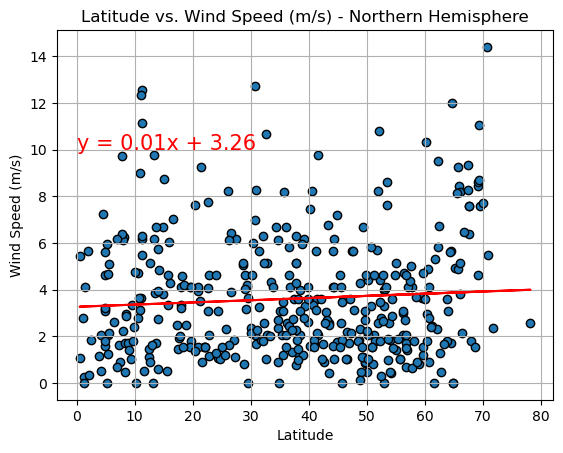

In [51]:
# Northern Hemisphere
linRegPlot(northern_hemi_df["Lat"],
           northern_hemi_df["Wind Speed"],
           "Latitude vs. Wind Speed (m/s) - Northern Hemisphere",
           "Latitude",
           "Wind Speed (m/s)")

The r-value is: -0.3356251065856675
The linear equation is: y = -0.07x + 2.53


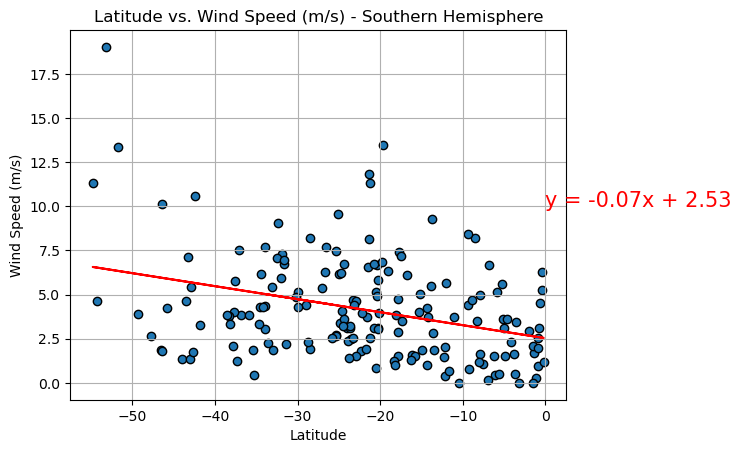

In [52]:
# Southern Hemisphere
linRegPlot(southern_hemi_df["Lat"],
           southern_hemi_df["Wind Speed"],
           "Latitude vs. Wind Speed (m/s) - Southern Hemisphere",
           "Latitude",
           "Wind Speed (m/s)")

**Discussion about the linear relationship:** 
The northen hemisphere has a positive correlation and the southern has a negative one, however they both increase in wind speed as you get farther from the equator.